# 배깅

## 각 모델의 다양성을 어떻게 확보할 것인가?

- 전체 데이터셋에서 랜덤 샘플링을 진행하여 여러 데이터셋을 생성
- 각 데이터셋으로 모델을 만듦
- 모델별로 학습하는 데이터셋의 다양성으로 인해 모델의 다양성이 확보됨

## 최종 결과물을 어떻게 결합할 것인가?

- 각 모델로부터 나온 예측치를 단순평균 냄

# 캐글 datasets - bank additional full_bank marketing campaigns dataset

## https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset?resource=download

# 데이터 불러오기

In [29]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./bank-additional-full.csv', sep = ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
# 범주형 변수(카테고리형 변수)를 수치화시키기 위해 one hot encoding 진행

data = pd.get_dummies(data, columns = ['job', 'marital', 'education', 'default', 'housing',
                                      'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [6]:
# 아이디 생성

data['id'] = range(len(data))

In [7]:
len(data)

41188

- 보통 train, test 비율은 7 : 3

In [8]:
# data 중에서 30000개를 랜덤으로 추출해 train 데이터로 지정

train = data.sample(30000, replace = False, random_state = 2022).reset_index().drop(['index'], axis = 1)

# 나머지 데이터를 test 데이터로 지정

test = data.loc[~data['id'].isin(train['id'])].reset_index().drop(['index'], axis = 1)

# 랜덤포레스트

## 특징

- 해석이 어려움
- 매우 느림
- 의사결정나무보다 더 객관적인 변수 중요도를 뽑아낼 수 있음

## 파라미터

- n_estimators: 몇 개의 의사결정나무를 만들 것인지
- max_depth: 각 의사결정나무의 최대 깊이
- min_samples_split: 각 의사결정나무에서 각 노드의 최소 샘플 수

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, min_samples_split = 10)

In [10]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'mon

In [11]:
# input 변수 지정

input_var = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

In [12]:
rf.fit(train[input_var], train['y'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
# 예측 진행

predictions = rf.predict(test[input_var])

In [14]:
test['pred'] = predictions

In [15]:
# 정확도

(test['pred'] == test['y']).mean()

0.9189309974973185

- 랜덤포레스트를 이용해 y를 예측했을 땐 91.9%의 정확도가 나옴

#### 의사결정나무와 비교

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split = 10)

In [17]:
dt.fit(train[input_var], train['y'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
test['pred'] = dt.predict(test[input_var])

In [19]:
(test['pred'] == test['y']).mean()

0.8946192348945299

- 의사결정나무를 이용하면 89%의 정확도가 나옴
- 따라서 랜덤포르세트의 예측정확도가 더 높음

# 변수중요도

- 모델에 활용한 input 변수 중에서 어떤 것이 target 값에 가장 큰 영향을 미쳤나
- 해당 중요도를 수치화시킨 것이 변수중요도
- tree형 모델(의사결정나무, 랜덤포레스트)에서 계산 가능

## 의사결정나무에서의 변수중요도

- 해당 input 변수가 의사결정나무의 구축에서 얼마나 많이 쓰이나
- 해당 변수를 기준으로 분기를 했을 때 각 구간의 복잡도가 얼마나 줄어드는가

## randomforest와 xgboost에서의 변수중요도

- 이들은 의사결정나무를 여러 개를 만드는 것
- 각각의 의사결정나무에 대해서 변수중요도를 계산
- 이를 평균 냄

In [20]:
# 변수중요도

feature_imp = rf.feature_importances_

In [21]:
imp_df = pd.DataFrame({'var' : input_var, 'imp' : feature_imp})
imp_df.sort_values(['imp'], ascending = False)

,var,imp
1,duration,3.222344e-01
8,euribor3m,9.903875e-02
9,nr.employed,7.284642e-02
0,age,5.445478e-02
3,pdays,3.944347e-02
...,...,...
38,housing_unknown,1.646377e-03
47,month_dec,9.138748e-04
25,marital_unknown,4.508492e-04
30,education_illiterate,1.858153e-04


- duration이 가장 중요한 변수

# 부스팅

## 각 모델의 다양성을 어떻게 확보할 것인가?

- 이전 모델에서 오분류한 객체에 가중치를 높여서 새로운 데이터로 모델 학습
- 각 데이터셋으로 모델을 만듦
- 모델별로 학습하는 데이터셋의 다양성으로 인해 모델의 다양성이 확보됨

## 최종 결과물을 어떻게 결합할 것인가?

- 각 모델로부터 나온 예측치를 가중평균 냄

## 파라미터

- learning_rate : 얼마나 빠르게 학습할 것인지(가중치를 얼마나 극단적으로 업데이트 시킬 것인지)
- n_estimators: 몇 개의 의사결정나무를 만들 것인지(가중치를 몇 번 업데이트하는지)
- 만일 n_estimators가 너무 높으면 노이즈에 민감한 오버피팅의 우려가 있음
- 만일 n_estimators가 너무 작으면 언더피팅의 우려가 있음
- 적절한 n_estimators를 찾아내는 것이 필수적인 요소

## 프로세스

- 일반적으로 learning_rate를 0.1 혹은 0.05로 고정시키고 n_estimators에 변형을 줘 모델을 학습시킴
- 만들어진 모델을 이용해 검증 데이터에서의 에러율을 봄
- 에러율이 가장 작은 n_estimators가 최적의 n_estimators

# Xgboost

## 특징

- 해석이 어려움
- 대체적으로 랜덤포레스트에 비해 빠르고 성능이 좋음

## 파라미터

- n_estimators: 몇 개의 의사결정나무를 만들 것인지
- learning_rate: 얼마나 빠르게 학습할 것인지

- xgboost가 없다면 
- !pip install xgboost

In [22]:
from xgboost import XGBClassifier

In [23]:
# xgboost 모델을 train 데이터에서 학습시킴

xgb = XGBClassifier(n_estimators = 300, learning_rate = 0.1, eval_metric = 'mlogloss')
xgb.fit(train[input_var], train['y'])

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [24]:
# 예측

test['pred'] = xgb.predict(test[input_var])

In [25]:
# 정확도

(test['pred'] == test['y']).mean()

0.921344297461566

In [27]:
# 최적의 n_estimators 찾기

for n in [100, 200, 300, 400, 500, 600, 700, 800, 900]:
    xgb = XGBClassifier(n_estimators = n, learning_rate = 0.1, eval_metric = 'mlogloss')
    xgb.fit(train[input_var], train['y'])
    test['pred'] = xgb.predict(test[input_var])
    print((test['pred'] == test['y']).mean())

0.921344297461566
0.921344297461566
0.921344297461566
0.9219699678226672
0.9214336789417232
0.9192885234179478
0.9188416160171612
0.91821594565606
0.917053986414015


- 최적의 n_estimators는 400

In [28]:
# 변수중요도

feature_imp = xgb.feature_importances_
imp_df = pd.DataFrame({'var' : input_var, 'imp' : feature_imp})
imp_df.sort_values(['imp'], ascending = False)

,var,imp
9,nr.employed,0.377905
62,poutcome_success,0.039183
53,month_oct,0.031534
1,duration,0.029237
7,cons.conf.idx,0.024124
...,...,...
44,contact_telephone,0.000000
36,default_yes,0.000000
41,loan_unknown,0.000000
61,poutcome_nonexistent,0.000000


- xgboost로 예측했을 때의 가장 중요한 변수는 nr.employed

### 일반적으로, 의사결정나무의 변수중요도보다

### 랜덤포레스트의 변수중요도가 더 신뢰성 있고

### 랜덤포레스트의 변수중요도보다

### Xgboost의 변수중요도가 더 신뢰성 있다

# shap value

## shapley 값의 의미

- 각 변수가 예측 결과물에 주는 영향력의 크기
- 해당 변수가 어떤 영향을 주는지

## shap value의 활용도

### 1. 변수중요도

### 2. dependence plot

- 해당 변수가 target 값에 어떤 영향을 미치는지

### 3. force plot

- 예측에 어떤 요소가 얼만큼의 영향력을 주는지

## 다시 데이터 불러오기

In [30]:
data = pd.read_csv('./bank-additional-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
# 범주형 변수를 수치화시키기 위해 one hot encoding 진행

data = pd.get_dummies(data, columns = ['job', 'marital', 'education', 'default', 'housing',
                                      'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [32]:
# 목표 변수를 yes는 1, no는 0으로 수치화
## shap value 패키지 특성상 목표변수를 수치화시키지 않으면 에러 발생

data['y'] = np.where(data['y'] == 'no', 0, 1)

In [33]:
# 학습에 활용할 input 변수 지정

input_var = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

## xgboost 학습

In [34]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 300, learning_rate = 0.1)

In [35]:
# xgboost 모델을 train 데이터에서 학습시킴

xgb.fit(data[input_var], data['y'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## shap value 활용

- shap이 없다면 아나콘다프롬프트에서 conda install -c conda-forge shap

In [36]:
import shap

### 1. 변수중요도

In [37]:
# 제작한 모델을 TreeExplainer 함수에 넣고, 학습한 train 데이터를 shap_values 함수에 넣음
# 변수중요도 추출

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(data[input_var])

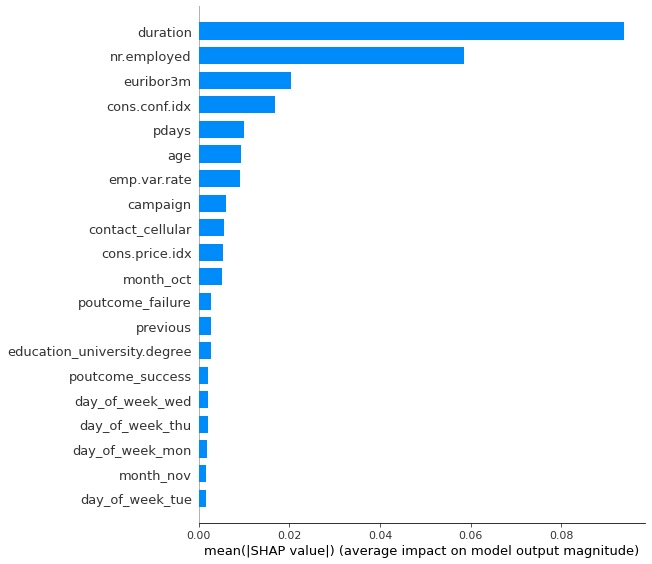

In [38]:
# 변수중요도를 summary_plot을 통해 시각화

shap.summary_plot(shap_values, data[input_var], plot_type = 'bar')

- duration변수가 가장 중요

### 2. dependence plot

- dependece_plot 함수는 특정 input 변수와 target변수와의 관계를 표현하는 dependence plot를 그려주는 함수

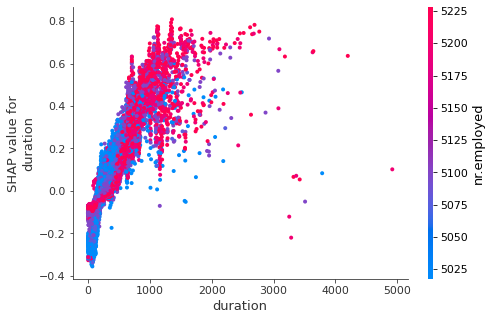

In [39]:
shap.dependence_plot('duration', shap_values, data[input_var])

- duration이 100~200 이전에는 타겟값이 0일 가능성이 높고
- duration이 그 이상이면 타겟값이 1일 가능성이 높음

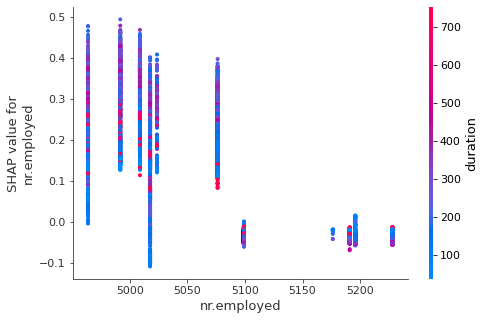

In [40]:
shap.dependence_plot('nr.employed', shap_values, data[input_var])

- nr.employed가 5100 이하일 때 타겟값이 1일 가능성이 높고
- 그 이상일 땐 타겟값이 0일 가능성이 높음

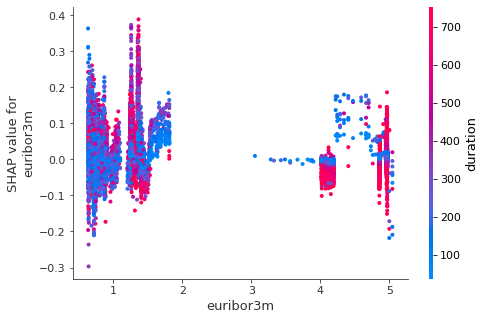

In [41]:
shap.dependence_plot('euribor3m', shap_values, data[input_var])

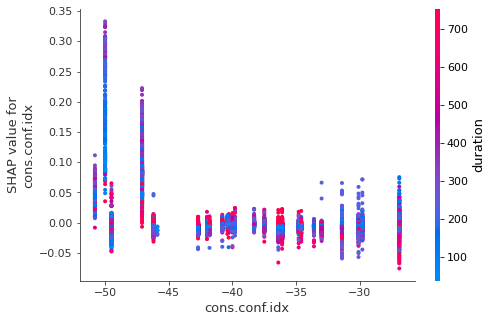

In [42]:
shap.dependence_plot('cons.conf.idx', shap_values, data[input_var])

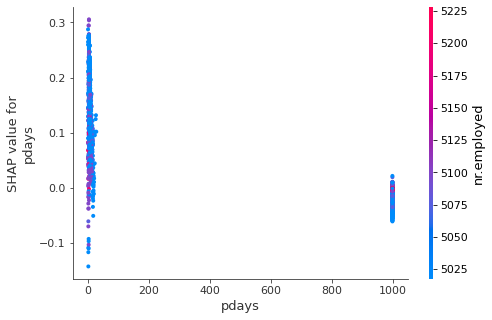

In [43]:
shap.dependence_plot('pdays', shap_values, data[input_var])

- pdays가 0일땐 타겟값이 1일 가능성이 높고
- pdays가 1000일땐 타겟값이 0일 가능성이 높음

### 3. force plot

In [44]:
data['pred'] = xgb.predict(data[input_var])

In [45]:
# force_plot 함수는 특정 값이 어떻게 예측되었는지를 시각화하는 force plot을 그려주는 함수

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[41187], data[input_var].iloc[41187])